# Notebook for doing some scratch work

## Collecting Wikipedia articles

In [53]:
import wikipedia

# using 3 distinct topics for testing
some_wikipedia_articles = ["Machine learning", "Computer Science", "Data Science", "Artificial Intelligence",
                           "Football", "Basketball", "Tennis", "American Football", "Baseball",
                           "Raccoon", "Cat", "Lion", "Platypus", "Lizard",
                           "Biochemistry", "Protein", "Nucleic acid double helix", "Hydrogen", "Enzyme"]

SUMMARY_PATH = "../data/wiki_data/summary/"
CONTENT_PATH = "../data/wiki_data/content/"

# write to the data sources
for article in some_wikipedia_articles:
    file_topic = "_".join(article.split())
    # Use summary of wikipedia articles as the data source
    with open(SUMMARY_PATH+f"{file_topic}.txt", "w") as f:
        f.write(wikipedia.page(article).summary)
    # try with entire wiki page too
    with open(CONTENT_PATH+f"{file_topic}.txt", "w") as f:
        f.write(wikipedia.page(article).content)
    print(article)

Machine learning
Computer Science
Data Science
Artificial Intelligence
Football
Basketball
Tennis
American Football
Baseball
Raccoon
Cat
Lion
Platypus
Lizard
Biochemistry
Protein
Nucleic acid double helix
Hydrogen
Enzyme


## Read the data from the source and also note the file names

In [94]:
import os

(_, _, filenames) = next(os.walk(CONTENT_PATH))

In [102]:
text_data = []
labels = []
for filename in filenames:
    with open(CONTENT_PATH+filename, "r") as f:
        text_data.append(" ".join(f.readlines()))
    labels.append(filename[:-4])

## Cleaning up the text

In [129]:
example = text_data[0]

example[:100]

'Proteins are large biomolecules, or macromolecules, consisting of one or more long chains of amino a'

In [130]:
example = example.lower()

example[:100]

'proteins are large biomolecules, or macromolecules, consisting of one or more long chains of amino a'

In [131]:
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n,—'"
for x in symbols:
    example = example.replace(x, ' ')

example[:100]

'proteins are large biomolecules  or macromolecules  consisting of one or more long chains of amino a'

In [132]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize

# nltk.download('stopwords')
default_stop_words = stopwords.words('english')

valid_words = [x for x in word_tokenize(example) if x not in default_stop_words and x.isalpha()]
" ".join(valid_words)[:100]

'proteins large biomolecules macromolecules consisting one long chains amino acid residues proteins p'

In [133]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()
stemmer= SnowballStemmer("english")

stemmed_words = [stemmer.stem(x) for x in valid_words]
" ".join(stemmed_words)[:100]

'protein larg biomolecul macromolecul consist one long chain amino acid residu protein perform vast a'

In [134]:
lemmatized_words = [lemmatizer.lemmatize(x) for x in valid_words]
" ".join(lemmatized_words)[:100]

'protein large biomolecules macromolecule consisting one long chain amino acid residue protein perfor'

In [136]:
# looks safe to just lemmatize then stem
stemmed_lemmatized_words = [stemmer.stem(lemmatizer.lemmatize(x)) for x in valid_words]
" ".join(stemmed_lemmatized_words)[:100]

'protein larg biomolecul macromolecul consist one long chain amino acid residu protein perform vast a'

In [137]:
cleaned_text = " ".join(stemmed_lemmatized_words)

In [138]:
# now to do this in a for loop
SYMBOLS = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n,—'"
STOP_WORDS = stopwords.words('english')

# we also want to keep track of the original and cleaned words so that they can be mapped back
original_words = []
changed_words = []
data = []

for text in text_data:
    text = text.lower()
    for symbol in SYMBOLS:
        text = text.replace(symbol, ' ')
    valid_words = [x for x in word_tokenize(text) if x not in STOP_WORDS and x.isalpha()]
    stemmed_lemmatized_words = [stemmer.stem(lemmatizer.lemmatize(x)) for x in valid_words]
    cleaned_text = " ".join(stemmed_lemmatized_words)
    original_words.extend(valid_words)
    changed_words.extend(stemmed_lemmatized_words)
    data.append(cleaned_text)

In [139]:
# can't use dictionary because some stems have multiple original words: I will use pandas
import pandas as pd

changed_to_original = pd.Series(original_words, index=changed_words)

## Tf-idf Vectorization

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [141]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.2, stop_words='english', use_idf=True)
vectors = vectorizer.fit_transform(data)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [142]:
df

,abandon,abil,abl,abnorm,absenc,absorb,abstract,abund,academ,accept,...,written,wrong,wrote,yale,yield,york,young,youth,zealand,zone
0,0.000000,0.010617,0.002517,0.004427,0.003336,0.000000,0.000000,0.003802,0.000000,0.000000,...,0.003802,0.000000,0.000000,0.000000,0.007110,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.024916,0.019822,0.056386,0.011020,0.008305,0.000000,0.011020,0.018932,0.000000,0.008849,...,0.018932,0.000000,0.000000,0.000000,0.008849,0.007379,0.059466,0.000000,0.000000,0.000000
2,0.002924,0.000000,0.015442,0.000000,0.000000,0.002924,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002598,0.000000,0.006232,0.005196,0.006980,0.007168,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.006993,0.003497,0.000000,0.023911,0.000000,0.000000,...,0.003985,0.000000,0.000000,0.000000,0.007451,0.006213,0.000000,0.000000,0.000000,0.000000
4,0.006506,0.000000,0.004908,0.000000,0.006506,0.000000,0.000000,0.014831,0.000000,0.000000,...,0.000000,0.000000,0.005780,0.000000,0.000000,0.000000,0.025880,0.000000,0.000000,0.014831
5,0.000000,0.000000,0.002281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002687,0.020064,0.000000,0.013435,0.002406,0.018531,0.003447,0.034470
6,0.000000,0.009277,0.000000,0.000000,0.000000,0.011661,0.000000,0.013290,0.014290,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010360,0.102043,0.000000,0.000000,0.013290
7,0.005622,0.026836,0.016964,0.003730,0.000000,0.000000,0.014919,0.000000,0.010335,0.008986,...,0.006408,0.003730,0.002497,0.000000,0.000000,0.002497,0.004473,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.007045,0.014091,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.015014,0.000000,0.005605,0.000000,0.000000,0.000000
9,0.003432,0.008191,0.007767,0.004554,0.003432,0.000000,0.004554,0.000000,0.008411,0.000000,...,0.000000,0.004554,0.003049,0.000000,0.007314,0.000000,0.000000,0.000000,0.000000,0.000000


## KMeans Clustering

In [143]:
from sklearn.cluster import KMeans

In [144]:
import numpy as np

In [145]:
# want to find number of clusters first
t = (df != 0).sum().sum()
m, n = df.shape
n_clusters = int(round((m*n)/t))

In [146]:
km = KMeans(n_clusters=4)
km.fit(df)

KMeans(n_clusters=4)

In [147]:
# print results as well as the prominent words
centers_ordered = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(4):
    indices = np.where(km.labels_ == i)[0]
    cluster_labels = [labels[i] for i in indices]
    print(f"Cluster #{i}:", ", ".join(cluster_labels))
    prominent_words = changed_to_original.loc[df.columns[centers_ordered[i][:5]]].unique()
    print("Prominent words:", ", ".join(prominent_words))
    print("==============================\n")

Cluster #0: Artificial_Intelligence, Machine_learning, Data_Science, Computer_Science
Prominent words: computational, computationally, computations, computing, computer, computers, computation, computed, compute, computationalism, computes, computics, computability, computable, data, machine, machines, science, sciences, learning, learn, learned, learnings, learns

Cluster #1: Tennis, American_Football, Football, Basketball, Baseball
Prominent words: players, player, ball, balls, balles, football, footballers, footballs, basketball, game, games, gaming

Cluster #2: Raccoon, Lion, Platypus, Cat, Lizard
Prominent words: species, cats, cat, males, male, females, female, prey, preying

Cluster #3: Protein, Hydrogen, Biochemistry, Enzyme, Nucleic_acid_double_helix
Prominent words: enzymes, enzyme, proteins, protein, dna, hydrogen, hydrogenation, acid, acids, acidic



In [148]:
test = df.copy()

In [152]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X_embedded = TSNE(n_components=2, perplexity=5).fit_transform(test)

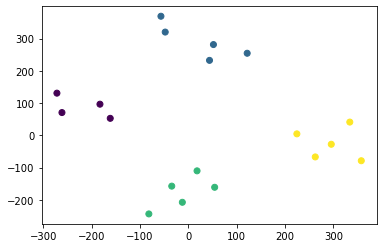

In [153]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=km.labels_, cmap='viridis')